In [ ]:
# COCO Dataset wget images ( train/val/test )
!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/zips/test2017.zip

# COCO Dataset wget annotations ( train/val/test )
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!wget http://images.cocodataset.org/annotations/image_info_test2017.zip


--2022-07-25 07:42:30--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.44.201
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.44.201|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  45.9MB/s    in 6m 50s  

2022-07-25 07:49:20 (45.0 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]

--2022-07-25 07:49:21--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.128.185
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.128.185|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  33.8MB/s    in 19s     

2022-07-25 07:49:40 (40.8 MB/s) - 

In [ ]:
!mkdir /content/data

!unzip /content/annotations_trainval2017.zip -d /content/data


!unzip /content/test2017.zip -d /content/data
!unzip /content/train2017.zip -d /content/data
!unzip /content/val2017.zip -d /content/data

unzip:  cannot find or open /content/annotations_trainval2017.zip, /content/annotations_trainval2017.zip.zip or /content/annotations_trainval2017.zip.ZIP.
unzip:  cannot find or open /content/test2017.zip, /content/test2017.zip.zip or /content/test2017.zip.ZIP.
unzip:  cannot find or open /content/train2017.zip, /content/train2017.zip.zip or /content/train2017.zip.ZIP.
unzip:  cannot find or open /content/val2017.zip, /content/val2017.zip.zip or /content/val2017.zip.ZIP.


In [1]:
!git clone https://github.com/facebookresearch/detectron2.git

Cloning into 'detectron2'...
remote: Enumerating objects: 14465, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 14465 (delta 15), reused 26 (delta 12), pack-reused 14425
Receiving objects: 100% (14465/14465), 5.94 MiB | 21.55 MiB/s, done.
Resolving deltas: 100% (10461/10461), done.


In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
#!pip install -U torch==1.8 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install -U torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html --quiet
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

In [3]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

1.8.0+cu111 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [4]:
# install detectron2:
!pip install detectron2==0.6 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.8/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.8/index.html
     |████████████████████████████████| 6.8 MB 773 kB/s 
     |████████████████████████████████| 79 kB 3.3 MB/s 
     |████████████████████████████████| 130 kB 25.3 MB/s 
     |████████████████████████████████| 151 kB 62.1 MB/s 
     |████████████████████████████████| 50 kB 4.7 MB/s 
     |████████████████████████████████| 106 kB 46.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 843 kB 52.7 MB/s 
     |████████████████████████████████| 117 kB 36.3 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=a51711f6e169f956bca1ad0082322155af135c3d2e0081384f367a1daa9d7bfb
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a

# Model Detectron2 Setting



In [5]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog
from detectron2.config import get_cfg
import random
from detectron2.utils.visualizer import Visualizer
import os

In [ ]:
from detectron2.data.datasets import register_coco_instances

register_coco_instances("my_dataset_train", {}, "/content/data/annotations/instances_train2017.json", "/content/data/train2017")
register_coco_instances("my_dataset_val", {}, "/content/data/annotations/instances_val2017.json", "/content/data/val2017")
# register_coco_instances("my_dataset_test", {}, "/content/test/_annotations.coco.json", "/content/test")


In [ ]:
#We are importing our own Trainer Module here to use the COCO validation evaluation during training. Otherwise no validation eval occurs.

from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

# Train

In [ ]:

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001


cfg.SOLVER.WARMUP_ITERS = 500
cfg.SOLVER.MAX_ITER = 1000 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05




cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 80 #your number of classes + 1

cfg.TEST.EVAL_PERIOD = 500


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

# Inference Run

# Inpating

In [6]:
# 깃허브 repository 가져오기
!git clone https://github.com/saic-mdal/lama.git

# 라이브러리 설치
!pip install torchtext==0.9
!pip install -r lama/requirements.txt --quiet
!pip install wget --quiet

# 경로이동
%cd /content/lama

# weight 다운로드
!curl -L $(yadisk-direct https://disk.yandex.ru/d/ouP6l8VJ0HpMZg) -o big-lama.zip
!unzip big-lama.zip

# 라이브러리 설치
!pip uninstall opencv-python-headless -y --quiet
!pip install opencv-python-headless==4.1.2.30 --quiet

# 라이브러리 호출
import base64, os
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
import matplotlib.pyplot as plt
import numpy as np
import wget
from shutil import copyfile
import shutil



canvas_html = """
<style>
.button {
  background-color: #4CAF50;
  border: none;
  color: white;
  padding: 15px 32px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
}
</style>
<canvas1 width=%d height=%d>
</canvas1>
<canvas width=%d height=%d>
</canvas>

<button class="button">Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')

var canvas1 = document.querySelector('canvas1')
var ctx1 = canvas.getContext('2d')


ctx.strokeStyle = 'red';

var img = new Image();
img.src = "data:image/%s;charset=utf-8;base64,%s";
console.log(img)
img.onload = function() {
  ctx1.drawImage(img, 0, 0);
};
img.crossOrigin = 'Anonymous';

ctx.clearRect(0, 0, canvas.width, canvas.height);

ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}

canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}

var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

# 그림 그리는 함수 선언
def draw(imgm, filename='drawing.png', w=400, h=200, line_width=1):
  display(HTML(canvas_html % (w, h, w,h, filename.split('.')[-1], imgm, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)

Cloning into 'lama'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 340 (delta 11), reused 11 (delta 3), pack-reused 316
Receiving objects: 100% (340/340), 9.86 MiB | 15.61 MiB/s, done.
Resolving deltas: 100% (97/97), done.
     |████████████████████████████████| 12.5 MB 4.9 MB/s 
     |████████████████████████████████| 22.3 MB 63.6 MB/s 
     |████████████████████████████████| 72 kB 597 kB/s 
     |████████████████████████████████| 144 kB 63.7 MB/s 
     |████████████████████████████████| 841 kB 55.0 MB/s 
     |████████████████████████████████| 271 kB 65.0 MB/s 
     |████████████████████████████████| 46 kB 3.0 MB/s 
     |████████████████████████████████| 48.3 MB 94 kB/s 
     |████████████████████████████████| 948 kB 50.6 MB/s 
     |████████████████████████████████| 74 kB 2.9 MB/s 
     |████████████████████████████████| 112 kB 65.6 MB/s 
     |████████████████████████████████| 

## pretrain weight down

In [7]:
!pwd

/content/lama


In [7]:
# https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md
!wget https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl

--2022-07-27 01:05:41--  https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 431414189 (411M) [application/octet-stream]
Saving to: ‘model_final_2d9806.pkl’

model_final_2d9806. 100%[===================>] 411.43M  55.2MB/s    in 7.9s    

2022-07-27 01:05:49 (51.9 MB/s) - ‘model_final_2d9806.pkl’ saved [431414189/431414189]



## Inference cfg

In [8]:
!mkdir -p /content/data/test2017
!mkdir -p /content/data/output

In [9]:
cfg = get_cfg()
cfg.OUTPUT_DIR = '/content/data/output/'

cfg.merge_from_file("/content/detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.MODEL.WEIGHTS = "/content/lama/model_final_2d9806.pkl"

cfg.DATASETS.TEST = ("my_dataset_test", )

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_dataset_test")


## cropper

In [10]:
def cropper(org_image_path, mask_array, out_file_name):
    num_instances = mask_array.shape[0]
    mask_array = np.moveaxis(mask_array, 0, -1)
    mask_array_instance = []
    img = imread(str(org_image_path))
    output = np.zeros_like(img)
    for i in range(num_instances):
        # a = mask_array[:, :, i:(i+1)]
        mask_array_instance.append(mask_array[:, :, i:(i+1)])
        output = np.where(mask_array_instance[i] == True, 255, output)

    im = Image.fromarray(output)
    im.save(out_file_name)

# Detector Segmentation

In [ ]:
!rm -rf /content/data/test2017/.ipynb_checkpoints

In [ ]:
# !rm -rf /content/lama/data_for_prediction
!rm -rf /content/lama/data_for_prediction/.ipynb_checkpoints

In [ ]:
!mkdir /content/lama/data_for_prediction

In [11]:
 !nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [12]:
import torch

torch.__version__

'1.8.0+cu111'

In [13]:
!nvidia-smi

Wed Jul 27 01:06:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    25W /  70W |   1586MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
!mkdir -p /content/lama/data_for_prediction/

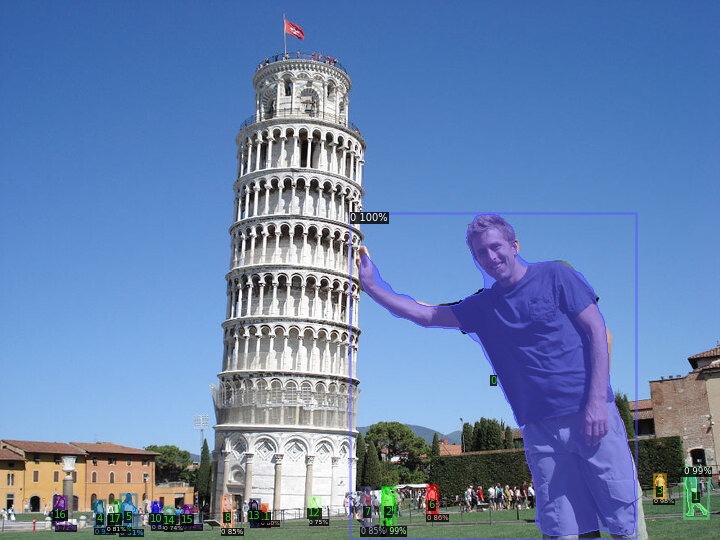

 ","로 구분해주세요 
1,3


In [20]:
from detectron2.utils.visualizer import ColorMode
import glob
from matplotlib.image import imread
import scipy.misc
from PIL import Image
import time

img_list = os.listdir('/content/data/test2017/')

for imageName in img_list:
    im = cv2.imread('/content/data/test2017/' + imageName)
    
    h, w, _ = im.shape

    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata, 
                scale=1,
                # instance_mode=ColorMode.IMAGE_BW # 굳이 필욘 없네 # remove the colors of unsegmented pixels. This option is only available for segmentation models
                    )
    
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    boxes = v._convert_boxes(outputs["instances"].pred_boxes.to('cpu')).squeeze()

    for idx, box in enumerate(boxes):
        out = v.draw_text(f"{idx}", ((box[0]+box[2])/2, (box[1]+box[3])/2), font_size = h//50, color = 'g') # 0번부터 아니고 1번부터 시작으로 할 수 있을 듯 (사용자 편의)

    cv2_imshow(out.get_image()[:, :, ::-1])

    # 사진이 print되는데 시간이 걸려서 대기시간 줌
    time.sleep(2)

#############

    mask = outputs['instances'].pred_masks
   

    print(' ","로 구분해주세요 ')
    select = map(int, input().split(','))
    select = list(select)

    tensor_list = []
   
    for a in select :
        tensor_list.append(mask[a])                           # 만약 idx+1 하면 select값에서 1을 빼야함
        
    tensor_stack = torch.stack(tensor_list)


    img_root = '/content/data/test2017/'
    img_path = img_root + imageName
    out_root = '/content/data/output/'
    out_path = out_root + imageName

    mask_array = tensor_stack.cpu().numpy()
    cropper(img_path, mask_array, out_path)

    shutil.copy(img_path, '/content/lama/data_for_prediction/'+imageName.split('.')[0]+'.jpg')

    # for dilate
    mask = cv2.imread(out_path)
    size = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
    dilate_img = cv2.dilate(mask, size)
    
    cv2.imwrite('/content/lama/data_for_prediction/'+imageName.split('.')[0] +'_mask.png', dilate_img)

# Inpainting Run

In [ ]:
!rm -rf /content/lama/data_for_prediction/.ipynb_checkpoints

In [27]:
!pwd

/content/lama


In [25]:
!rm -rf /content/data/output/.ipynb_checkpoints

In [31]:
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (15,5)
# plt.rcParams['figure.dpi'] = 200
# plt.subplot(131)

!PYTHONPATH=. TORCH_HOME=$(pwd) python3 bin/predict.py model.path=$(pwd)/big-lama indir=$(pwd)/data_for_prediction outdir=/content/output dataset.img_suffix=.jpg > /dev/null


# for a in os.listdir('/content/data/output') :
#   # 출력데이터도 png
#   plt.imshow(plt.imread(f"/content/data/output/"+a))
#   _=plt.axis('off')
#   _=plt.title('inpainting result')
#   plt.show()
#   fname = None

100% 1/1 [00:00<00:00,  1.19it/s]


In [ ]:
!rm -rf /content/lama/data_for_prediction/.ipynb_checkpoints

In [ ]:
!rm -rf /content/output/.ipynb_checkpoints